In [6]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('movie_dataset/genres.csv')

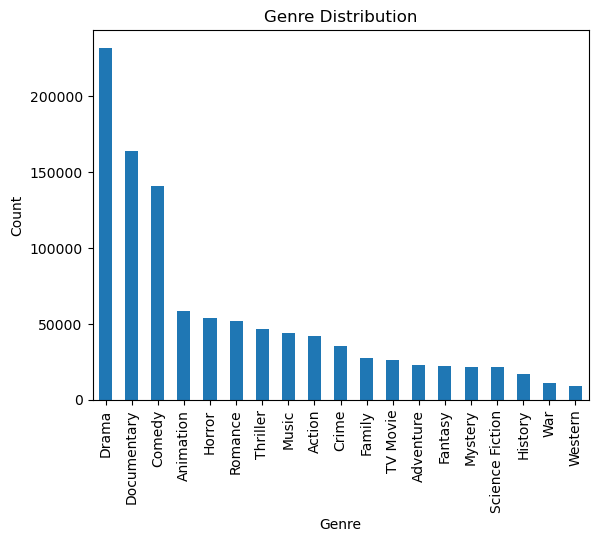

In [13]:
genre_counts = df["genre"].value_counts()

# Plot the bar chart
genre_counts.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.show()